## Statistical Testing for ML Models

### QSAR Fish Toxicity Dataset
This dataset comes from the UCI Machine Learning Repository and is used to predict 
acute aquatic toxicity of chemical compounds to fish (LC50, measured in -log(mol/L)).
Each sample represents one compound, described by molecular descriptors such as
hydrophobicity, polarity, and electronic properties.

### Regression Model for Fish Toxicity
Input: 6 continuous molecular descriptors
Target: LC50 (quantitative measure of toxicity)
Goal: Predict the continuous toxicity value (LC50) from the molecular features.

Data shape: (908, 6), Target mean: 4.064


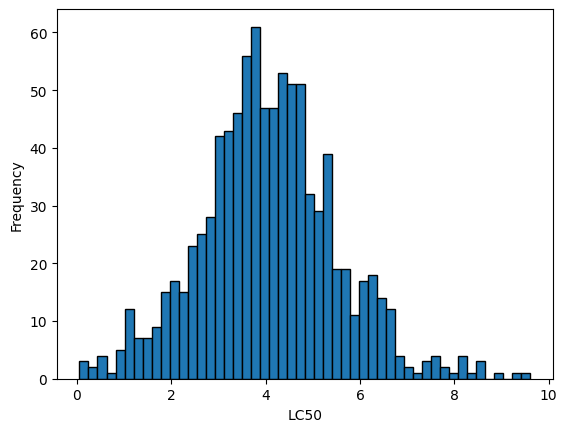

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy import stats

# seed
np.random.seed(42)

# load from file
df = pd.read_csv("qsar_fish_full.csv")
X = df.drop(columns=["LC50"])
y = df["LC50"].astype(float).values

print(f"Data shape: {X.shape}, Target mean: {np.mean(y):.3f}")

# plot target distribution
plt.hist(y, bins=50, edgecolor='black')
plt.xlabel('LC50')
plt.ylabel('Frequency')
plt.show()


### Task:

We want to compare the performance of a Linear Regression model and a Random Forest Regressor on the QSAR fish toxicity dataset to make a recommendation on which model to use in future projects.
We already implemented a backbone for a 10 fold cross validation to evaluate both models, you just need to implement the missing lines. The stakeholder wants to know if one model significantly (alpha=0.05) outperforms the other in terms of $R^2$.

Please complete the code:

LinearRegression: [0.542 0.588 0.654 0.244 0.421 0.7   0.639 0.572 0.648 0.571]
RandomForestRegressor: [0.571 0.643 0.586 0.361 0.54  0.719 0.742 0.604 0.688 0.673]
t = -2.977, p = 0.016
significant


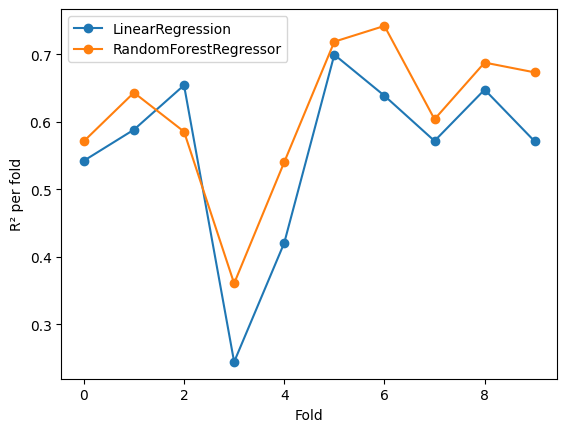

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
k = 10

idx = # your code goes here, create a random permutation of the list of indices of the dataset (np.random.permuatation can be used)

fold_size = len(X) // k  # how many samples go into each fold


scores_lin, scores_rf = [], []

for i in range(k):
    # take the i-th chunk of indices of size fold_size
    # from the shuffled index list idx
    test_idx =  # your code goes here, select test indices for fold i
    train_idx = # your code goes here, select train indices for fold i (all indices not in test_idx)

    X_train = X.iloc[train_idx] #select training data for fold i using the train indices
    X_test = X.iloc[test_idx] # select test data for fold i using the test indices
    y_train = y[train_idx] # select training targets for fold i using the train indices
    y_test = y[test_idx] # select test targets for fold i using the test indices


    # here are the models we want to compare:
    lin = LinearRegression()
    rf = RandomForestRegressor(random_state=42, n_estimators=200, max_depth=8)

    lin.fit(X_train, y_train)
    rf.fit(X_train, y_train)

    y_pred_lin = lin.predict(X_test)
    y_pred_rf = rf.predict(X_test)

    r2_score_lin = r2_score(y_test, y_pred_lin)
    r2_score_rf = r2_score(y_test, y_pred_rf)
    scores_lin.append(r2_score_lin)
    scores_rf.append(r2_score_rf)

print("LinearRegression:", np.round(scores_lin, 3))
print("RandomForestRegressor:", np.round(scores_rf, 3))

t, p = # your code goes here, perform an appropriate statistical test to compare the two sets of scores using the stats library https://docs.scipy.org/doc/scipy/reference/stats.html
print(f"t = {t:.3f}, p = {p:.3f}")

significance = "not significant"
if p < 0.05:
    significance = "significant"
print(significance)

plt.plot(scores_lin, 'o-', label='LinearRegression')
plt.plot(scores_rf, 'o-', label='RandomForestRegressor')
plt.ylabel("R² per fold")
plt.xlabel("Fold")
plt.legend()
plt.show()
